In [1]:
import numpy as np
import matplotlib.pyplot as plt


b = 8.20e-3 # Pa*m constant 
p = 100.713e3 # Pa variable with each drop
s_p = 0.1e3 # Pa variable with each drop
n = 1.844e-5 # N*s*m^-2 constant
ro = 886 #(kg/m^3) constant
g = 9.8 # m/s^2 constant
d = 7.65e-3 # m variable with different setups (only changed once) 
s_d = 0.01e-3 # (in m) variable with different setups (only changed once) 
V = 500 # V variable, recorded throughout
s_V = 1 # variable

vf = 9.452e-6 # m/s varible with each run
s_vf = 0.012e-6 # m/s variable with each run

vr = 1.422e-4 # m/s variable with each run
s_vr = 0.16e-4 # m/s variable with each run

q = (4*np.pi/3)*(np.sqrt(((b/(2*p))**2)+(9*n*(vf)/(2*ro*g)))-(b/(2*p)))**3*(ro*g*d*((vf)+(vr))/(V*(vf)))


def find_q_old(b,p,s_p,n,ro,g,d,s_d,V,s_V,vf,s_vf,vr,s_vr):
    q = (4*np.pi/3)*(np.sqrt(((b/(2*(p+s_p)))**2)+(9*n*(vf+s_vf)/(2*ro*g)))-(b/(2*(p+s_p))))**3*(ro*g*(d+s_d)*((vf+s_vf)+(vr+s_vr))/((V+s_V)*(vf+s_vf)))
    return q
    #q = (4*np.pi/3)*(np.sqrt((b/(2*(p+s_p))**2)+(9*n*(vf+s_vf)/(2*ro*g)))-(b/(2*(p+s_p))))**3*(ro*g*(d+s_d)*((vf+s_vf)+(vr+s_vr))/((V+s_V)*(vf+s_vf)))
    #return q                 

q_mid = find_q_old(b,p,0,n,ro,g,d,0,V,0,vf,0,vr,0)

# do these individually with only one uncertainty at a time
# them for the full uncertainty, we need to sum them in quatrature like so
# np.sqrt(q_s_p**2 + q_s_d**2 + ...)

q_high = find_q_old(b,p,s_p,n,ro,g,d,s_d,V,s_V,vf,s_vf,vr,s_vr)
q_low = find_q_old(b,p,-s_p,n,ro,g,d,-s_d,V,-s_V,vf,-s_vf,vr,-s_vr)
print(q_mid)

# VVV Not right, supposed to subtract from qmid then /2 or something
#print(f'+- {np.sqrt((q_high-q_mid)**2+(q_mid-q_low)**2)}')

1.616514787034804e-19


In [2]:
## Finding the values of V for each inputted data
def find_v(t_rise,t_fall, s_t, dist):
    """
    Returns array (v_rise, sigma_v_rise, v_fall, sigma_v_fall)
    """
    avg_rise = np.average(t_rise)
    avg_fall = np.average(t_fall)
    # then uncertainty is the last value returned for each and should be scaled by the same operation
    # so it should be s_v = s_t/t_rise*v_rise (same thing for fall too just swap rise to fall)
    v_rise = dist/avg_rise
    s_v_rise = s_t/avg_rise*v_rise
    
    v_fall = dist/avg_fall
    s_v_fall = s_t/avg_fall*v_fall
    return v_rise,s_v_rise,v_fall,s_v_fall

## Finding the Q values for each drop individually
def q_calc(b,p,s_p,n,ro,g,d,s_d,V,s_V,vf,s_vf,vr,s_vr):
    q = (4*np.pi/3)*(np.sqrt(((b/(2*(p+s_p)))**2)+(9*n*(vf+s_vf)/(2*ro*g)))-(b/(2*(p+s_p))))**3*(ro*g*(d+s_d)*((vf+s_vf)+(vr+s_vr))/((V+s_V)*(vf+s_vf)))
    return q


### constants, setting these to defaults
# b = 8.20e-3 # Pa*m constant 
# n = 1.844e-5 # N*s*m^-2 constant
# ro = 886 #(kg/m^3) constant
# g = 9.8 # m/s^2 constant
def find_q(vr,s_vr,vf,s_vf,p,s_p,d,s_d,V,s_V,n,b=8.20e-3,ro=886,g=9.8):
    # get base calculation then find others for different uncertainty measurements
    q_mid = q_calc(b,p,0,n,ro,g,d,0,V,0,vf,0,vr,0)
    
    q_h_p = q_calc(b,p,s_p,n,ro,g,d,0,V,0,vf,0,vr,0)
    q_l_p = q_calc(b,p,-s_p,n,ro,g,d,0,V,0,vf,0,vr,0)
    q_p = (np.abs(q_h_p-q_mid)+np.abs(q_l_p-q_mid))/2.
    
    q_h_d = q_calc(b,p,0,n,ro,g,d,s_d,V,0,vf,0,vr,0)
    q_l_d = q_calc(b,p,0,n,ro,g,d,-s_d,V,0,vf,0,vr,0)
    q_d = (np.abs(q_h_d-q_mid)+np.abs(q_l_d-q_mid))/2.
    
    q_h_V = q_calc(b,p,0,n,ro,g,d,0,V,s_V,vf,0,vr,0)
    q_l_V = q_calc(b,p,0,n,ro,g,d,0,V,-s_V,vf,0,vr,0)
    q_V = (np.abs(q_h_V-q_mid)+np.abs(q_l_V-q_mid))/2.
    
    q_h_vf = q_calc(b,p,0,n,ro,g,d,0,V,0,vf,s_vf,vr,0)
    q_l_vf = q_calc(b,p,0,n,ro,g,d,0,V,0,vf,-s_vf,vr,0)
    q_vf = (np.abs(q_h_vf-q_mid)+np.abs(q_l_vf-q_mid))/2.
    
    q_h_vr = q_calc(b,p,0,n,ro,g,d,0,V,0,vf,0,vr,s_vr)
    q_l_vr = q_calc(b,p,0,n,ro,g,d,0,V,0,vf,0,vr,-s_vr)
    q_vr = (np.abs(q_h_vr-q_mid)+np.abs(q_l_vr-q_mid))/2.
    
    
    # now sum all them in quatrature to get full uncertainty value
    uncert = np.sqrt(q_p**2+q_d**2+q_V**2+q_vf**2+q_vr**2)
    
    return q_mid,uncert


class Drop:
    """
    Drop with values of the rise and fall times for the data inputted (tab-separated or space-separated value)
    Then the distance traveled for each rise and fall time (should be same value for each 0.5mm major tick, 0.1mm minor tick marks)
    Then takes in the different values for each drop separately (pressure, 
    length of separator (dependent on setup) (d-value in the setup manual I think), and Voltage (with uncertainties for each)).
    (SI UNITS FOR ALL)
    """
    def __init__(self,times,s_times,dist,pressure,s_pressure,length,s_length,Volt,s_Volt,n):
        self.p = pressure
        self.s_p = s_pressure
        self.d = length
        self.s_d = s_length
        self.V = Volt
        self.s_V = s_Volt
        self.n = n
        self.times = np.fromstring(times,sep=' ').reshape(-1,2)
        # fixing dist for this to be 0.5 mm bc it's the same dist traveled for all
        v_vals = find_v(self.times[:,0],self.times[:,1],s_times,dist)
        self.v_rise = v_vals[0]
        self.s_v_rise = v_vals[1]
        self.v_fall = v_vals[2]
        self.s_v_fall = v_vals[3]
        self.q = find_q(self.v_rise,self.s_v_rise,self.v_fall,self.s_v_fall,self.p,self.s_p,self.d,self.s_d,self.V,self.s_V,self.n)
        
    def __str__(self):
        return f'V Rise: {self.v_rise} +/- {self.s_v_rise}\nV Fall: {self.v_fall} +/- {self.s_v_fall}'

    

In [3]:
#### Universal Variables applicable across all drops
# some values like b and n are defaults in the function of find_q()

distance = 0.0005 # 0.5 mm for each record
s_t = 0.4 # = 2x human reaction time

############### DATA #####################
drop_1_data = """ 
3.5	70.41
3.98	50.33
3.51	40.74
3.88	52.93
3.26	35.54
2.96	45.83
3.36	55.99
3.65	51.07
3.41	72.51
3.56	63.65
"""  # the drop times for drop#1 (unknown charge for each, so keep the data separate)

## Creating drop 1 (d1) and finding charge then setting it in d1 (mainly for testing since we got this earlier (above))
d1 = Drop(drop_1_data, s_t, distance, 100.713e3,0.1e3,7.65e-3,0.01e-3,500,1,1.844e-5)
print(d1.q)

drop_2_data = """
3.7	10.97
3	10.97
3.16	10.75
3.48	10.95
3.13	10.09
3.45	9.8
4.98	9.79
5	10.57
5.1	10.19
5.05	9.69
"""

d2 = Drop(drop_2_data,s_t,distance, 101.049e3,0.11e3,7.72e-3,0.02e-3,500,1,1.83e-5)
print(d2.q)

drop_3_data = """
4.34	20.64
4.65	21.96
4.58	20.19
2.69	23.21
2.55	18.88
2.86	21.38
2.96	20.09
2.71	20.63
3.45	23.13
4.43	20.44
4.5	19.23
2.46	20.85
2.45	19.58
2.78	18.74
2.68	18.63
2.53	16.46
2.85	21.06
1.76	20.91
2	21.09
1.81	17.82
1.35	17.41
1.5	22.19
4.45	20.16
4.35	26.83
4.32	20.91
"""

d3 = Drop(drop_3_data,s_t,distance,100.889e3,0.093e3,7.72e-3,0.02e-3,502,1,1.832e-5)
print(d3.q)

drop_4_data = """
3.86	31.24
3.47	23.61
3.54	20.18
3.97	22.61
3.54	22.54
3.8	23.08
3.56	26.35
3.51	19.96
3.26	24.16
3.51	26.73
3.16	20.68
3.46	24.26
3.68	23.76
3.6	23.9
3.95	21.51
3.78	24.23
3.41	22.46
3.63	24.53
3.83	25.95
3.36	19.84
3.7	23.1
3.48	22.16
3.7	23.93
3.55	20.91
3.88	23.98
3.68	23.7
3.4	27.23
3.66	22.73
3.73	22.98
3.75	19.61
"""

d4 = Drop(drop_4_data,s_t,distance,100.815e3,0.1e3,7.72e-3,0.02e-3,507,1,1.834e-5)
print(d4.q)


drop_5_data = """
3.67	22.05
3.45	22.15
3.51	20.54
3.65	23.75
3.63	23.78
3.99	20.13
3.83	25.06
3.95	25.83
3.75	22.75
"""

d5 = Drop(drop_5_data,s_t,distance,100.739e3,0.1e3,7.72e-3,0.02e-3,508,1,1.837e-5)
print(d5.q)


(1.5974367833645196e-19, 1.7135269782108078e-20)
(5.20370173784187e-19, 4.138250583540621e-20)
(3.70512120742215e-19, 4.220025427023873e-20)
(2.8918802938317563e-19, 2.800302644619447e-20)
(2.8732145523322066e-19, 2.6919295921192958e-20)


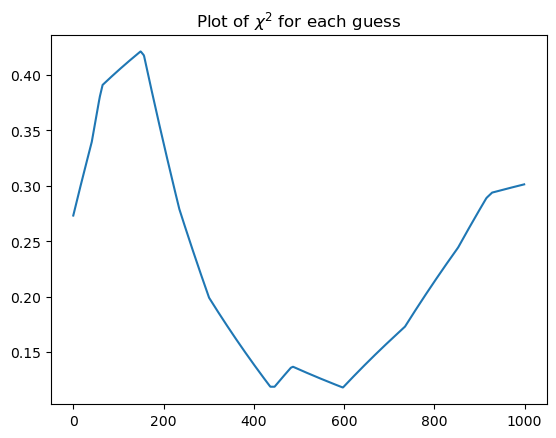

Value of q that minimizes chi^2: 1.596999999999934e-19
[1.0002735  3.25842313 2.32005085 1.81082047 1.79913247]


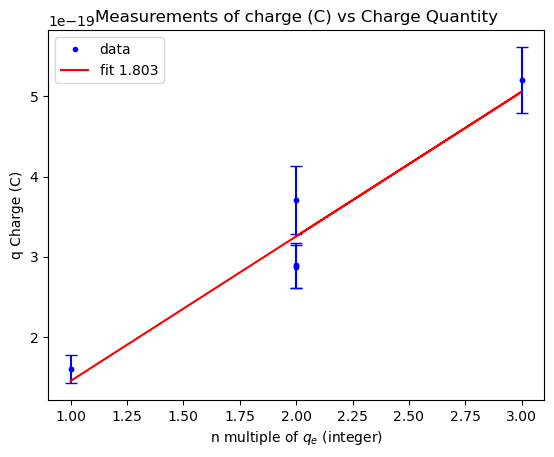

[ 1.80313248e-19 -3.51994040e-20]
[2.95128026e-20 6.19065771e-20]


In [4]:
### Now make the plot of the values then fit a line to find the value of e by itself

### we want to plot the estimated number of charges on the x axis, then the value of the charge (q) on the y axis
### then fit a linear fit with chi^2 to see what the slope is?

#q_estimate = 1.6e-19 # Coulombs
drop_data = np.array([d1.q,d2.q,d3.q,d4.q,d5.q])
#x_vals = (drop_data[:,0]/q_estimate)

""" For the q_estimate
Find a charge that when divided into each one of your measured 
charges gives a result within an error bar or two of an integer for each and every charge. The 
smallest charge you measure or the smallest difference between two charges should be a good 
candidate for the number to divide by.
"""

# trying different values for q_estimate until it's within a small % of the uncertainty of each towards an integer value
## So ideally we want each to be very close to integer values (1,2,3, etc)
q_est = np.arange(1,2,0.001)*1e-19 # just to get a rough estimate around 1.6 or so

# for plotting chi^2
x_plot = np.arange(0,len(q_est))
y_plot = []

#drop_data*=1e19 # just for now, will change back later
least_chi = np.sqrt(np.sum(np.full(len(drop_data[:,0]),1e9))) # initial guess value for chi (very overestimate so get good approx in beginning)
q = 0

for i in q_est:
    # chi^2 = (round(val)-val)**2 = dist to val, then whatever gives the least chi^2
    val = drop_data[:,0]/i
    # 1/uncert**2 = wt
    # then sum(wt*val)/sum(wt)
    wts = 1/(drop_data[:,1]**2)
    wted_vals = np.abs(np.round(val)-val)*wts
    #print(wted_vals)
    
    # now can just take the sum of weighted values whatever reduces that the most
    chi = np.sum(wted_vals)/np.sum(wts)
    y_plot.append(chi)
    #chi = (1/5)*np.sum((val-np.round(val))**2/((drop_data[:,1])**2))
    #chi = np.sqrt(np.sum((np.round(val)-val)**2)) # summing the values in quadatrue (like the distance formula of vector so I guess its ok??)
    #print(f'{chi=}')
    #print(f'{least_chi=}')
    #print(f'{i=}\n')
    #if((chi<=least_chi).all()): # using .all() to say we want all elements of chi to be <= least_chi
    if(chi<=least_chi):
        least_chi=chi
        #print(f'New value of q: {i} for chi:{chi}')
        q = i

plt.plot(x_plot,y_plot)
plt.title('Plot of $\chi^2$ for each guess')
plt.show()
print(f'Value of q that minimizes chi^2: {q}')

# now value that minimizes q is set, we can divide each measurement by that
# then plot it and find the best fit line from that
x_vals = np.round(drop_data[:,0]/q)
print(drop_data[:,0]/q)
y_vals = drop_data[:,0]

plt.errorbar(x_vals,y_vals,drop_data[:,1],fmt='b.',capsize=4)
plt.plot(x_vals,y_vals,'b.',label='data')
fit,cov = np.polyfit(x_vals,y_vals,1,cov=True)
p = np.poly1d(fit)
plt.plot(x_vals, p(x_vals),'r',label=(f'fit {fit[0]*1e19:.3f}'))
plt.xlabel('n multiple of $q_e$ (integer)')
plt.ylabel('q Charge (C)')
plt.legend()
plt.title('Measurements of charge (C) vs Charge Quantity')
plt.show()
print(fit)
print(np.sqrt(np.diag(cov)))



In [5]:
import numpy as np
def do_sig(val1,valerr1,val2,valerr2):
    '''
    Find sigma of 2 values (see if 2 values are in agreement or not)
    '''
    uncer = np.sqrt((valerr1**2)+(valerr2**2))
    diff = np.absolute(val1-val2)
    return (diff/uncer)


# 1.803e-19}{} \pm \SI{3.52e-20

# do sigma on expected vs obtained charge of electron
do_sig(1.60217e-19,0,1.803e-19,3.52e-20)

0.5705397727272723